# Define the Objective
### Name: Judson Tillotson

# Objective

Utilizing Bitcoin Data over time, we will predict future prices. We are utilizing long-term predictions, and the type of prediction is the price level. 

We will then benchmark our data against the S&P 500 data from yfinance to see if it is a valid long term investment. The Sharpe Ratio is the Risk adjusted return, as Crypto has historically been more volatile than stocks, we will need to check return vs. risk to determine if it is work it.

# Gather Data

In [5]:
#pip install yfinance 
#I did not have yfinance installed, so I installed it using the pip code

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I will use 10 years worth of data from January 1st 2015 to January 1st 2025. That should be plenty of data points to find a good model.

In [8]:
start = "2015-01-01"
end = "2025-01-01"

We will then Fetch the data from yfinance for Bitcoin and the S&P 500.

In [10]:
BTC = yf.download("BTC-USD", start = start, end = end)
sp500 = yf.download("^GSPC", start = start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


I want to see the first few rows of each Data Set to see what I am working with.

In [12]:
print(BTC.head())
print(sp500.head())

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2015-01-01  314.248993  320.434998  314.002991  320.434998   8036550
2015-01-02  315.032013  315.838989  313.565002  314.079010   7860650
2015-01-03  281.082001  315.149994  281.082001  314.846008  33054400
2015-01-04  264.195007  287.230011  257.612000  281.145996  55629100
2015-01-05  274.473999  278.341003  265.084015  265.084015  43962800
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  446011000

# Data Processing
I will need to check for any missing values, and I will need to calculate the Daily returns to compare performances. 
By looking at the first few rows, I see a vast difference in price point, so percentages will need to be used to put it into the same context.

In [14]:
print("Missing values in BTC data:\n", BTC.isnull().sum())
print("Missing values in S&P 500 data:\n", sp500.isnull().sum())

Missing values in BTC data:
 Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Missing values in S&P 500 data:
 Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


No missing values, so we can move on to the next step. 

In [16]:
BTC['Daily Return'] = BTC['Close'].pct_change()

sp500['Daily Return'] = sp500['Close'].pct_change()


We now want to see if we have any NAN values, because after creating the new column, we might have created some

In [18]:
print(BTC.head())
print(sp500.head())

Price            Close        High         Low        Open    Volume  \
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD   
Date                                                                   
2015-01-01  314.248993  320.434998  314.002991  320.434998   8036550   
2015-01-02  315.032013  315.838989  313.565002  314.079010   7860650   
2015-01-03  281.082001  315.149994  281.082001  314.846008  33054400   
2015-01-04  264.195007  287.230011  257.612000  281.145996  55629100   
2015-01-05  274.473999  278.341003  265.084015  265.084015  43962800   

Price      Daily Return  
Ticker                   
Date                     
2015-01-01          NaN  
2015-01-02     0.002492  
2015-01-03    -0.107767  
2015-01-04    -0.060079  
2015-01-05     0.038907  
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                       

It looks like we have created a NAN value at the top of our new column. We will need to fix that at a later step.

# Visualize Price Trends
I want to take a look at the price trends on a graph to see what it looks like.

The first graph is just a basic look at how over time the price has changed.

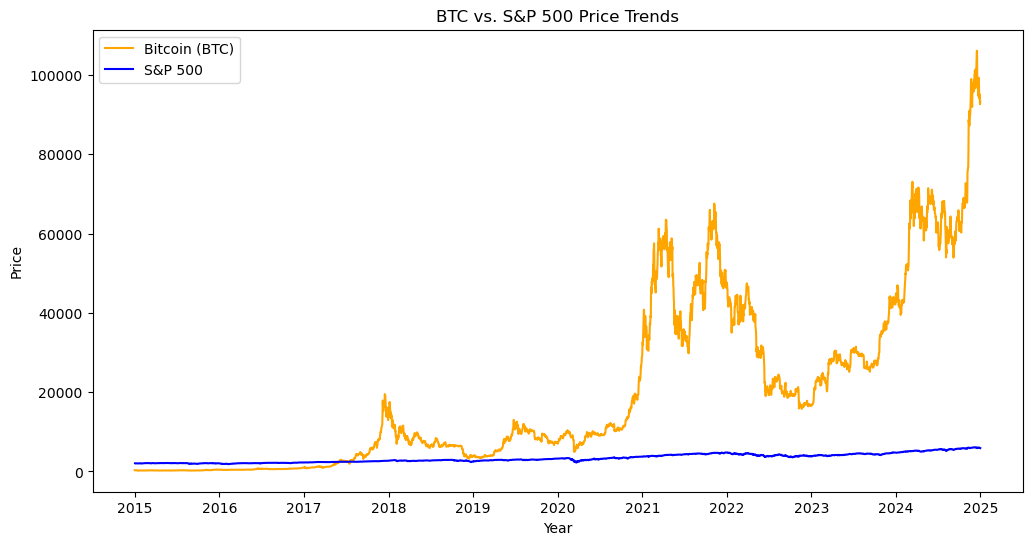

In [21]:
plt.figure(figsize=(12,6))
plt.plot(BTC['Close'], label="Bitcoin (BTC)", color='orange')
plt.plot(sp500['Close'], label="S&P 500", color='blue')
plt.title("BTC vs. S&P 500 Price Trends")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()


The second graph has monthly markers, grid lines and has the years marked at the bottom.

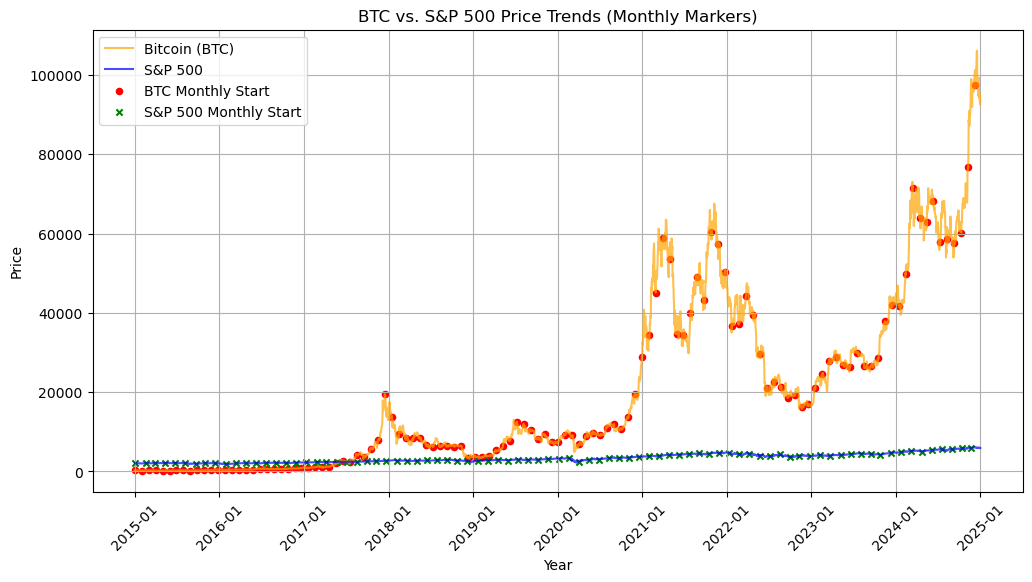

In [23]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.plot(BTC['Close'], label="Bitcoin (BTC)", color='orange', alpha=0.7)
plt.plot(sp500['Close'], label="S&P 500", color='blue', alpha=0.7)


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.scatter(BTC.index[::30], BTC['Close'][::30], color='red', marker='o', s=20, label="BTC Monthly Start")
plt.scatter(sp500.index[::30], sp500['Close'][::30], color='green', marker='x', s=20, label="S&P 500 Monthly Start")

plt.title("BTC vs. S&P 500 Price Trends (Monthly Markers)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Compare the Returns and Volatility
We as the potential investors do not just want to see cumulative returns, we also want to see volatility. Both are needed for our Sharpes' ratio

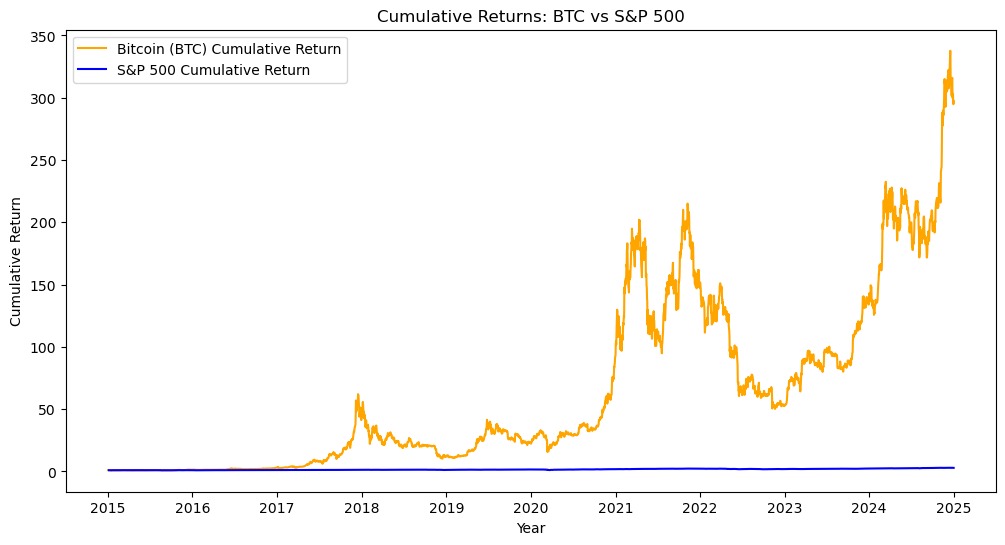

In [25]:
BTC_cum_return = (1 + BTC['Daily Return']).cumprod()
sp500_cum_return = (1 + sp500['Daily Return']).cumprod()


plt.figure(figsize=(12,6))
plt.plot(BTC_cum_return, label="Bitcoin (BTC) Cumulative Return", color='orange')
plt.plot(sp500_cum_return, label="S&P 500 Cumulative Return", color='blue')
plt.title("Cumulative Returns: BTC vs S&P 500")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

We need to drop the NAN at this stage, because if we had them involved, they would not work.
We want a histogram in order to see frequency and the average distance from 0. I also want to see yearly returns just to see what we are working with.

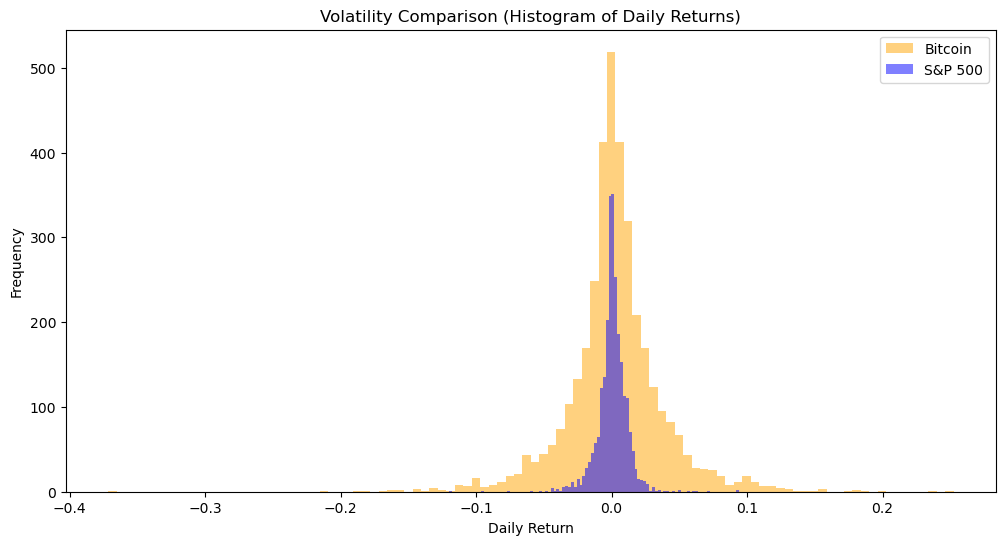

In [27]:
plt.figure(figsize=(12,6))
plt.hist(BTC['Daily Return'].dropna(), bins=100, alpha=0.5, label="Bitcoin", color='orange')
plt.hist(sp500['Daily Return'].dropna(), bins=100, alpha=0.5, label="S&P 500", color='blue')
plt.title("Volatility Comparison (Histogram of Daily Returns)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Calculate Sharpe Ratio
The next thing I need to work on is to calculate the Sharpe Ratio. This will calculate the risk-adjusted returns. Having a higher Sharpe Ratio is a good thing. It means that you have better risk-adjusted returns. If the returns are negative, then that means that they do not meet the return of an investment relative to its risk. Fetches U.S. 10-Year Treasury Bond yield to be used as the safe rate. I want it to be dynamic based on current projections.

In [29]:
treasury = yf.download("^TNX")  # ^TNX represents the 10-Year Treasury yield in Yahoo Finance

[*********************100%***********************]  1 of 1 completed


In [30]:
treasury.head(5)

Price,Close,High,Low,Open,Volume
Ticker,^TNX,^TNX,^TNX,^TNX,^TNX
Date,,,,,
1962-01-02,4.06,4.06,4.06,4.06,0
1962-01-03,4.03,4.03,4.03,4.03,0
1962-01-04,3.99,3.99,3.99,3.99,0
1962-01-05,4.02,4.02,4.02,4.02,0
1962-01-08,4.03,4.03,4.03,4.03,0


In [31]:
print(treasury.dtypes)

Price   Ticker
Close   ^TNX      float64
High    ^TNX      float64
Low     ^TNX      float64
Open    ^TNX      float64
Volume  ^TNX        int64
dtype: object


I need to create the Daily return, that way we can match the data from

In [33]:
treasury['Daily Return'] = treasury['Close'].pct_change()
treasury_average_rate = treasury['Daily Return'].mean()
risk_free_rate1 = treasury_average_rate / 100  

print("Current Risk-Free Rate:", risk_free_rate1)

Current Risk-Free Rate: 1.416866427978279e-06


Above I calculated the Daily Risk free rate, and I made it dynamic based on current projections. That allows it to change based on how the bond market looks overall. I calculated the mean of the treasury rate and then converted that from a percentage so that I can use that in the bottom cell. 

Below, I am calculating the Sharpe ratio based on the daily risk free rate above.

In [35]:
def sharpe_ratio(returns, risk_free_rate):
    return (returns.mean() - risk_free_rate) / returns.std()

BTC_sharpe = sharpe_ratio(BTC['Daily Return'].dropna(), risk_free_rate1)
sp500_sharpe = sharpe_ratio(sp500['Daily Return'].dropna(), risk_free_rate1)

print(f"Bitcoin Sharpe Ratio:", BTC_sharpe.round(2))
print(f"S&P 500 Sharpe Ratio:", sp500_sharpe.round(2))

Bitcoin Sharpe Ratio: 0.06
S&P 500 Sharpe Ratio: 0.04


So, that means that both returns are not adequeately compensating for the risk. A couple notes, this is including BTC's start which was a wild increase as shown in the graph above. 

So, a couple ideas:
1. what if I zoom into the last 5 years and see if since it stabalized some is that worth it?
2. What if I convert to a yearly rate instead and see if that is better, from year start to end.

Let's do the first one first.

In [38]:
Start_date_last_5 = "2020-01-01"
BTC_last_5 = BTC.loc[Start_date_last_5:end]
sp500_last_5 = sp500.loc[Start_date_last_5:end]

In [72]:
def sharpe_ratio(returns, risk_free_rate):
    return (returns.mean() - risk_free_rate) / returns.std()

BTC_sharpe = sharpe_ratio(BTC_last_5['Daily Return'].dropna(), risk_free_rate1)
sp500_sharpe = sharpe_ratio(sp500_last_5['Daily Return'].dropna(), risk_free_rate1)

print(f"Bitcoin Sharpe Ratio last 5 years:",BTC_sharpe.round(2))
print(f"S&P 500 Sharpe Ratio last 5 years:",sp500_sharpe.round(2))

Bitcoin Sharpe Ratio last 5 years: 0.06
S&P 500 Sharpe Ratio last 5 years: 0.04


We got the same values, so not great. That must not have been the reason why it is so low. I will try again with the yearly rates.

In [41]:
BTC_yearly = BTC['Close'].resample('Y').last()
sp500_yearly = sp500['Close'].resample('Y').last()

BTC_yearly_return = BTC_yearly.pct_change().dropna()
sp500_yearly_return = sp500_yearly.pct_change().dropna()

print("BTC Yearly Returns:\n", BTC_yearly_return)
print("S&P 500 Yearly Returns:\n", sp500_yearly_return)

BTC Yearly Returns:
 Ticker        BTC-USD
Date                 
2016-12-31   1.238311
2017-12-31  13.688979
2018-12-31  -0.735618
2019-12-31   0.922034
2020-12-31   3.031601
2021-12-31   0.596679
2022-12-31  -0.642652
2023-12-31   1.554174
2024-12-31   1.210547
S&P 500 Yearly Returns:
 Ticker         ^GSPC
Date                
2016-12-31  0.095350
2017-12-31  0.194200
2018-12-31 -0.062373
2019-12-31  0.288781
2020-12-31  0.162589
2021-12-31  0.268927
2022-12-31 -0.194428
2023-12-31  0.242305
2024-12-31  0.233090


In [77]:
treasury = yf.download("^TNX", period="1d")
annual_risk_free_rate = treasury['Close'].iloc[-1] / 100
print(f"Annual Risk-Free Rate:",annual_risk_free_rate.round(4))

[*********************100%***********************]  1 of 1 completed

Annual Risk-Free Rate: Ticker
^TNX    0.044
Name: 2025-04-09 00:00:00, dtype: float64


In [43]:
def sharpe_ratio_yearly(returns, risk_free_rate):
    return (returns.mean() - risk_free_rate) / returns.std()

BTC_sharpe_yearly = sharpe_ratio_yearly(BTC_yearly_return.dropna(), annual_risk_free_rate)
sp500_sharpe_yearly = sharpe_ratio_yearly(sp500_yearly_return.dropna(), annual_risk_free_rate)

print("BTC Yearly Sharpe Ratio:", BTC_sharpe_yearly)
print("S&P 500 Yearly Sharpe Ratio:", sp500_sharpe_yearly)


BTC Yearly Sharpe Ratio: Ticker
BTC-USD   NaN
^TNX      NaN
dtype: float64
S&P 500 Yearly Sharpe Ratio: Ticker
^GSPC   NaN
^TNX    NaN
dtype: float64


I cannot figure out why it is giving me Not a Number. It should be working. Let's see if there are any NaN's in the data set. 

In [45]:
BTC_yearly.isna().sum()

Ticker
BTC-USD    0
dtype: int64

My best guess is that I do not have enough rows in my table to get a value. Not sure why though, it should work.

In [46]:
correlation = BTC['Daily Return'].corr(sp500['Daily Return'])
print("Correlation between BTC and S&P 500:", correlation.round(2))

Correlation between BTC and S&P 500: 0.23


They are not correlated.